<h3 style="color:#0033A0">Importing Python Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<h3 style="color:#0033A0">Converting final master csv file to dataframe </h3>

In [2]:
final_master_df = pd.read_csv("final_master_cleaned.csv")

In [3]:
final_master_df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,handle_time,speed_to_answer
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,agent: thank you for calling united airlines c...,matthew foster,4.0,voluntary cancel,neutral,angry,-0.04,0.39,1860.0,420.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,"agent: thank you for calling united airlines, ...",tammy walters,1.0,booking,calm,neutral,0.02,0.35,720.0,180.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,agent: thank you for calling united airlines c...,jeffery dixon,1.0,irrops,neutral,polite,-0.13,0.32,1140.0,480.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,agent: thank you for calling united airlines c...,david wilkins,2.0,upgrade,neutral,frustrated,-0.20,0.20,420.0,300.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,agent: thank you for calling united airlines c...,elizabeth daniels,0.0,seating,neutral,polite,-0.05,0.35,540.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,agent: thank you for calling united airlines c...,dennis singleton dds,1.0,post flight,calm,calm,0.05,0.34,1680.0,540.0
71806,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,agent: thank you for calling united airlines c...,paul mitchell,1.0,upgrade,calm,frustrated,0.03,0.22,480.0,180.0
71807,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,agent: thank you for calling united airlines c...,kaylee lang,1.0,upgrade,calm,polite,0.05,0.42,360.0,360.0
71808,8332067080,8095620266,161354,2024-08-31 23:53:00,2024-08-31 23:59:00,2024-09-01 00:03:00,agent: thank you for calling united airlines c...,christine oneal,1.0,irrops,neutral,polite,-0.07,0.13,240.0,360.0


<center>
  <h1 style="color:#0033A0">Deliverable 1</h1>
</center>

<center>Long average handle time (AHT) affects both efficiency and customer satisfaction. Explore the factors contributing to extended call durations, such as agent performance, call types, and sentiment. Identify key drivers of long AHT and AST, especially during high volume call periods. Additionally, could you quantify the percentage difference between the average handling time for the most frequent and least frequent call reasons?</center>

The factors for extended call durations and key drivers for long AHT and AST during high volume call were derived by following these methods:

<br>1.Call reason vs AHT dependency.</br>
<br>3.Silence Percentage vs AHT dependency.</br>
<br>3.Sentiment Analysis with AHT dependency.</br>
<br>4.Agent Tone Analysis for AHT variations.</br>
<br>5.Agent Specific Call Routing.</br>
<br>6.Anti-Fatique vs AHT.</br>
<br>7.Customer Loyality with AHT variation.</br> 
<br>The percentage difference between the average handling time for the most frequent and least frequent call reason is also calculated.</br>


In [4]:
print(final_master_df['primary_call_reason'].unique()) #unique primary_call_reason

['voluntary cancel' 'booking' 'irrops' 'upgrade' 'seating' 'mileage plus'
 'checkout' 'voluntary change' 'post flight' 'check in' 'other topics'
 'communications' 'schedule change' 'products and services'
 'digital support' 'disability' 'unaccompanied minor' 'baggage'
 'traveler updates' 'etc']


<h3 style="color:#0033A0">1.Call Reason related grouped data </h3>

In [6]:
call_reason_stats = final_master_df.groupby('primary_call_reason').agg({
    'handle_time': 'mean',
    'speed_to_answer': 'mean',
    'call_id': 'count'  # to calculate frequency of each call reason
}).reset_index()

In [7]:
# Renamed columns for clarity
call_reason_stats = call_reason_stats.rename(columns={
    'handle_time': 'AHT',
    'speed_to_answer': 'AST',
    'call_id': 'call_count'
})



In [8]:
call_reason_stats   

,primary_call_reason,AHT,AST,call_count
0,baggage,333.644068,542.097458,2832
1,booking,427.736064,240.227531,2637
2,check in,574.128151,355.840336,1904
3,checkout,1016.853814,724.703390,1888
4,communications,826.718750,239.968750,3840
5,digital support,372.293878,505.714286,1225
6,disability,292.109181,503.523573,403
7,etc,962.899160,544.285714,952
8,irrops,760.061728,381.923327,18468
9,mileage plus,995.573406,361.015211,5851


<h3 style="color:#0033A0">Average Handle Time vs Call Reasons Graph</h3>

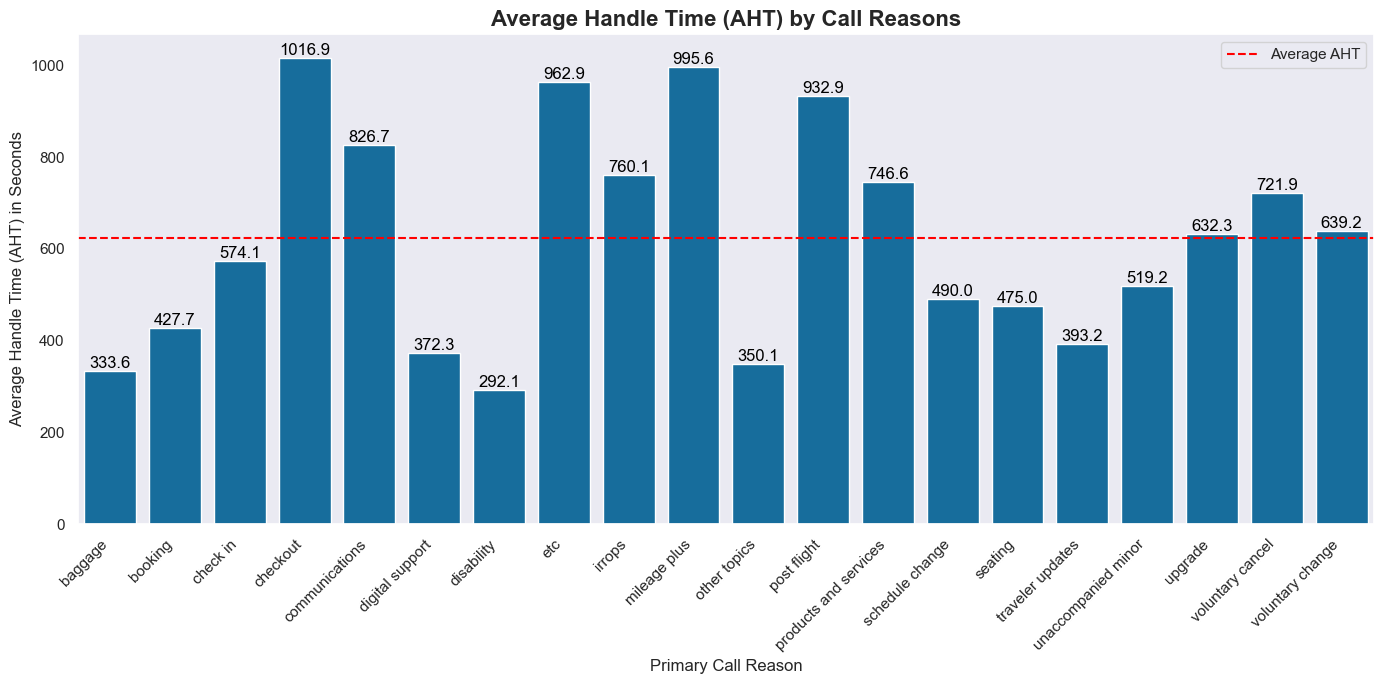

In [9]:
# Plotting the call reasons and their corresponding AHT


# Set the style and context for better aesthetics
sns.set(style="dark", palette="colorblind")

# Created the plot
plt.figure(figsize=(14, 7))

# Plot AHT by Call Reasons
sns.barplot(x='primary_call_reason', y='AHT', data=call_reason_stats)
sns.dark_palette("#69d", reverse=True, as_cmap=True)

# Added data labels on top of the bars
for index, row in call_reason_stats.iterrows():
    plt.text(index, row['AHT'], f"{row['AHT']:.1f}", color='black', ha="center", va="bottom")

# Customized the x-ticks
plt.xticks(rotation=45, ha='right')

# Added labels and title
plt.xlabel("Primary Call Reason", fontsize=12)
plt.ylabel("Average Handle Time (AHT) in Seconds", fontsize=12)
plt.title("Average Handle Time (AHT) by Call Reasons", fontsize=16, weight='bold')

# Added a horizontal line for average AHT across all call reasons
plt.axhline(call_reason_stats['AHT'].mean(), color='red', linestyle='--', label='Average AHT')

# Added legend
plt.legend()

plt.tight_layout()
plt.show()


<h3 style="color:#0033A0">2.The percentage difference between the average handling time for the most frequent and least frequent call reasons </h3>

In [10]:
# Sorted by the most frequent call reasons
call_reason_stats = call_reason_stats.sort_values(by='call_count', ascending=False)

# Step 3: Calculated percentage difference between the most frequent and least frequent call reasons in terms of AHT
most_frequent_call_reason = call_reason_stats.iloc[0]['AHT']
least_frequent_call_reason = call_reason_stats.iloc[-1]['AHT']
percentage_difference = ((most_frequent_call_reason - least_frequent_call_reason) / least_frequent_call_reason) * 100

print(f"Percentage difference in AHT between most and least frequent call reasons: {percentage_difference:.2f}%")

Percentage difference in AHT between most and least frequent call reasons: 46.38%


<h3 style="color:#0033A0">3.Silence Percentage analysis </h3>

In [11]:
# Silence percentage analysis: Checking if high silence percent correlates with long AHT
silence_analysis = final_master_df.groupby('silence_percent_average').agg({
    'handle_time': 'mean',
    'speed_to_answer': 'mean'
}).reset_index()

In [12]:
# Renamed columns for clarity
silence_analysis = silence_analysis.rename(columns={
    'handle_time': 'AHT_sa',
    'speed_to_answer': 'AST_sa',
})


In [13]:
silence_analysis

,silence_percent_average,AHT_sa,AST_sa
0,0.00,100.645161,440.040323
1,0.01,340.371747,453.122677
2,0.02,254.245810,446.424581
3,0.03,263.865672,435.044776
4,0.04,275.016234,440.698052
...,...,...,...
94,0.94,330.000000,397.500000
95,0.95,1230.000000,585.000000
96,0.96,980.000000,450.000000
97,0.97,580.000000,460.000000


<h3 style="color:#0033A0"> Silence Percentage vs Average Handle Time Graph </h3>

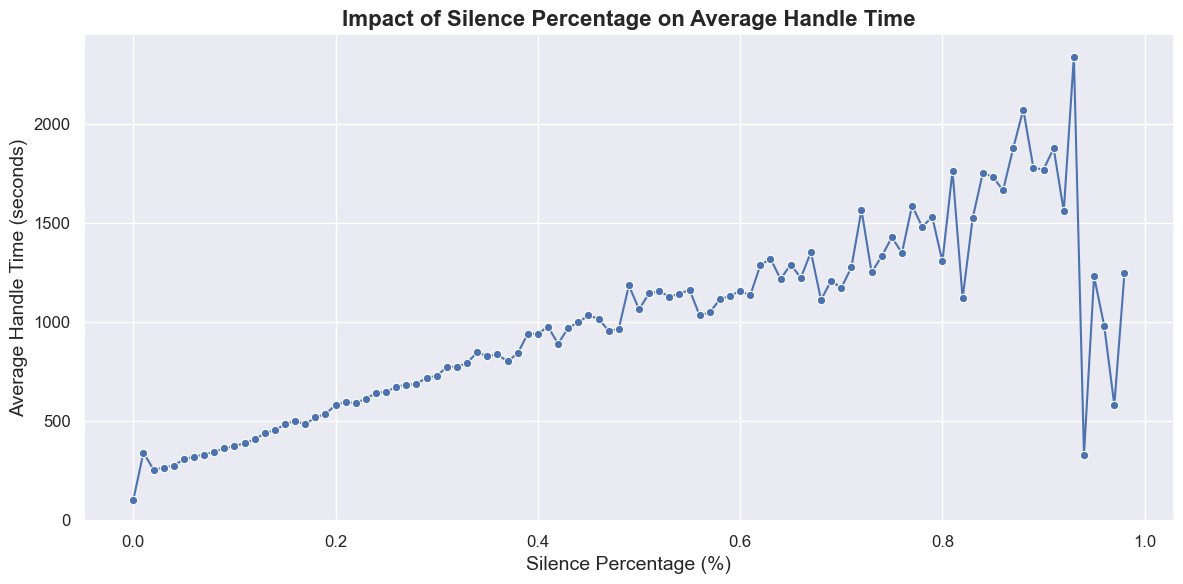

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and context for better aesthetics
sns.set(style="dark")  # You can change 'talk' to your preferred context

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='silence_percent_average', y='AHT_sa', data=silence_analysis, marker='o', color='b')

# Add titles and labels
plt.title("Impact of Silence Percentage on Average Handle Time", fontsize=16, fontweight='bold')
plt.xlabel("Silence Percentage (%)", fontsize=14)
plt.ylabel("Average Handle Time (seconds)", fontsize=14)

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


<h3 style="color:#0033A0">3.Sentiment Analysis </h3>

In [15]:
# Sentiment analysis: Group by sentiment scores to check how customer/agent tone impacts AHT
sentiment_analysis = final_master_df.groupby('average_sentiment').agg({
    'handle_time': 'mean',
    'speed_to_answer': 'mean'
}).reset_index()

In [16]:
# Rename columns for clarity
sentiment_analysis = sentiment_analysis.rename(columns={
    'handle_time': 'AHT_sea',
    'speed_to_answer': 'AST_sea',
})

In [17]:
sentiment_analysis

,average_sentiment,AHT_sea,AST_sea
0,-1.38,60.0,480.0
1,-1.25,0.0,540.0
2,-1.22,120.0,240.0
3,-1.19,60.0,600.0
4,-1.17,0.0,240.0
...,...,...,...
178,0.93,60.0,600.0
179,0.96,720.0,480.0
180,1.00,50.0,410.0
181,1.38,240.0,300.0


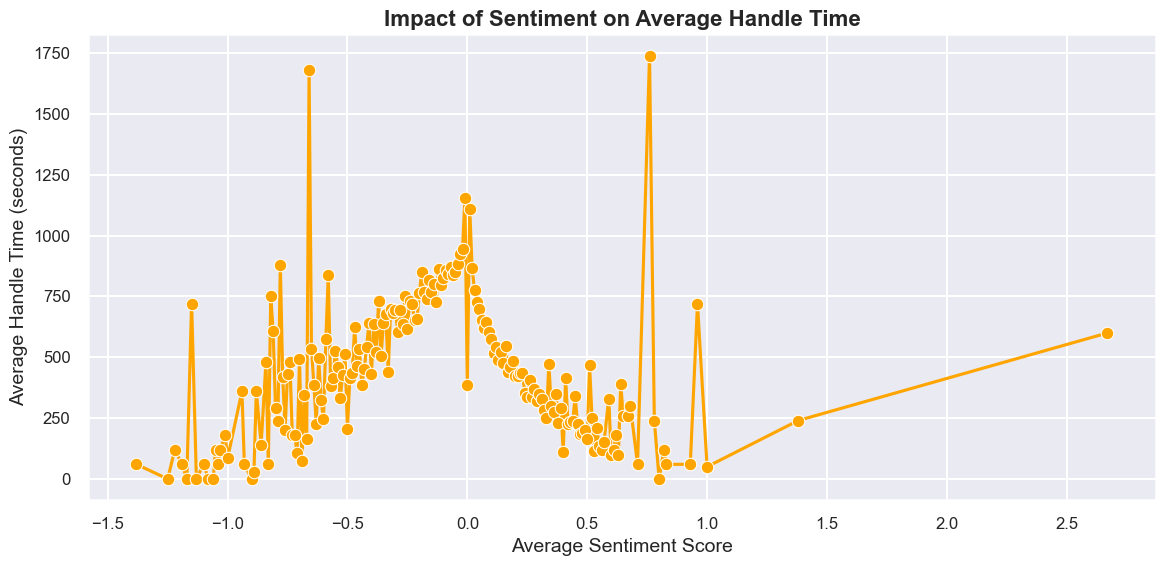

In [18]:

# Set the style and context for better aesthetics
sns.set(style="darkgrid", context="talk")  # You can change 'talk' to your preferred context

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='average_sentiment', y='AHT_sea', data=sentiment_analysis, marker='o', color='orange')

# Add titles and labels
plt.title("Impact of Sentiment on Average Handle Time", fontsize=16, fontweight='bold')
plt.xlabel("Average Sentiment Score", fontsize=14)
plt.ylabel("Average Handle Time (seconds)", fontsize=14)

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [19]:
# Calculate correlation between sentiment and AHT
sentiment_aht_corr = final_master_df[['average_sentiment', 'handle_time']].corr()

In [20]:
sentiment_aht_corr

,average_sentiment,handle_time
average_sentiment,1.000000,-0.076057
handle_time,-0.076057,1.000000


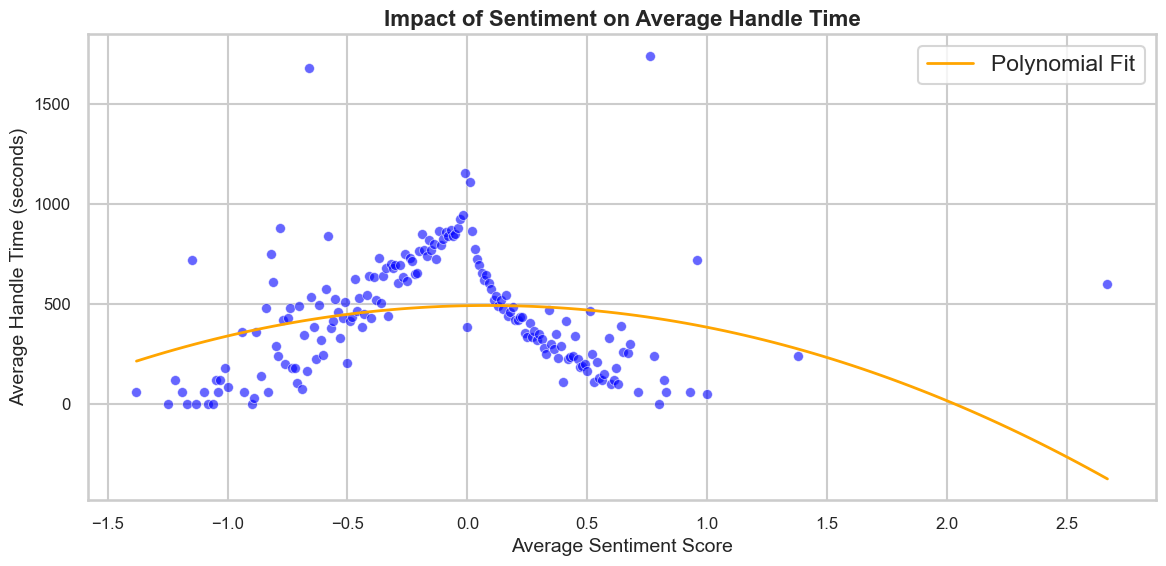

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style and context for better aesthetics
sns.set(style="whitegrid", context="talk")

# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='average_sentiment', y='AHT_sea', data=sentiment_analysis, 
                color='blue', alpha=0.6, s=50)

# Fit a polynomial regression curve (degree 2)
# Get the values for the polynomial fit
x = sentiment_analysis['average_sentiment']
y = sentiment_analysis['AHT_sea']
coefficients = np.polyfit(x, y, 2)
polynomial = np.poly1d(coefficients)

# Create a smooth line for the polynomial
x_range = np.linspace(x.min(), x.max(), 100)
y_fit = polynomial(x_range)

# Plot the polynomial curve
plt.plot(x_range, y_fit, color='orange', linewidth=2, label='Polynomial Fit')

# Add titles and labels
plt.title("Impact of Sentiment on Average Handle Time", fontsize=16, fontweight='bold')
plt.xlabel("Average Sentiment Score", fontsize=14)
plt.ylabel("Average Handle Time (seconds)", fontsize=14)

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


<h3 style="color:#0033A0">3.Agent Tone Analysis </h3>

In [22]:
# Agent tone analysis: Group by agent tone  to check how customer/agent tone impacts AHT
agent_tone_analysis = final_master_df.groupby('agent_tone').agg({
    'handle_time': 'mean',
    'speed_to_answer': 'mean'
}).reset_index()

In [23]:
# Rename columns for clarity
agent_tone_stats = agent_tone_analysis.rename(columns={
    'handle_time': 'AHT',
    'speed_to_answer': 'AST'
})

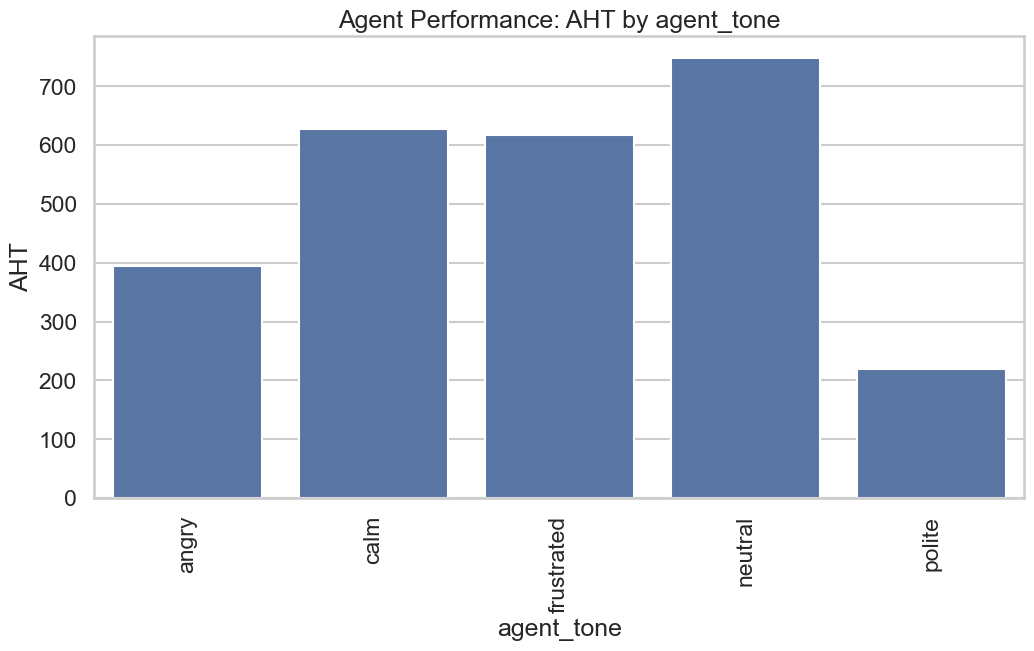

In [24]:

plt.figure(figsize=(12, 6))
sns.barplot(x='agent_tone', y='AHT', data=agent_tone_stats)
plt.xticks(rotation=90)
plt.title("Agent Performance: AHT by agent_tone")
plt.show()

<h3 style="color:#0033A0">4.Customer Tone Analysis </h3>

In [25]:
# Customer tone analysis: Group by customer tone  to check how customer/agent tone impacts AHT
customer_tone_analysis = final_master_df.groupby('customer_tone').agg({
    'handle_time': 'mean',
    'speed_to_answer': 'mean'
}).reset_index()

In [26]:
# Rename columns for clarity
customer_tone_stats = customer_tone_analysis.rename(columns={
    'handle_time': 'AHT',
    'speed_to_answer': 'AST'
})

In [27]:
customer_tone_stats

,customer_tone,AHT,AST
0,angry,695.530261,436.445031
1,calm,699.604098,437.832299
2,frustrated,692.738764,436.803371
3,neutral,707.625312,437.754085
4,polite,689.659731,436.499896


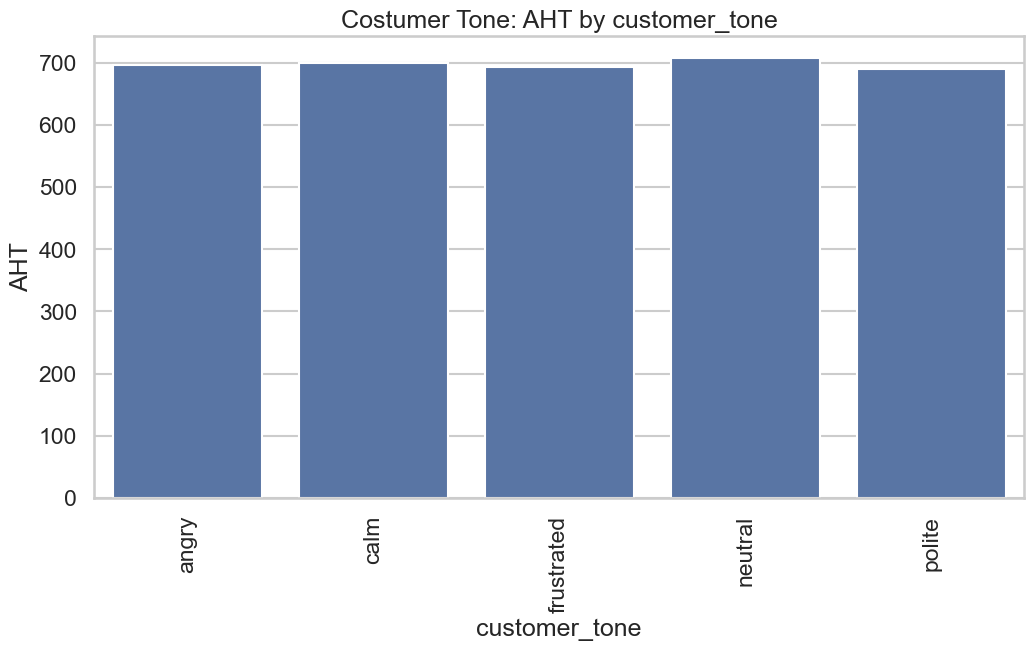

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_tone', y='AHT', data=customer_tone_stats)
plt.xticks(rotation=90)
plt.title("Costumer Tone: AHT by customer_tone")
plt.show()

<h3 style="color:#0033A0">4.Agent performance Analysis </h3>

In [29]:
# Customer tone analysis: Group by customer tone  to check how customer/agent tone impacts AHT
agent_performance_analysis = final_master_df.groupby('agent_id').agg({
    'handle_time': 'mean',
    'speed_to_answer': 'mean',
    'call_id' : 'count'
}).reset_index()

In [30]:
# Rename columns for clarity
agent_performance_stats = agent_performance_analysis.rename(columns={
    'handle_time': 'AHT',
    'speed_to_answer': 'AST',
    'call_id': 'total_calls'
})

In [31]:
threshold_25th_percentile = agent_performance_stats['total_calls'].quantile(0.25) # found lowest 25th percentile in terms of total calls

In [32]:
print(threshold_25th_percentile)

54.5


In [33]:
agent_performance_stats = agent_performance_stats[agent_performance_stats["total_calls"]>threshold_25th_percentile] #for affecting totally AHT we took ony top 75 percentile who takes 75% calls

In [34]:
agent_performance_stats #75 percentile agengts

,agent_id,AHT,AST,total_calls
1,103651,747.382550,420.805369,298
2,106000,689.203540,438.053097,113
5,113217,675.957447,461.702128,282
6,114609,988.656716,453.134328,67
7,119952,740.481928,433.012048,249
...,...,...,...,...
377,980508,669.431438,441.471572,299
378,981776,703.106796,428.737864,309
379,981779,683.788546,441.938326,227
380,982131,722.222222,436.666667,270


In [35]:
sorted_df = agent_performance_stats.sort_values(by='AHT', ascending=False) # sorted the dataframe in descending order with respect to AHT

In [36]:
sorted_df

,agent_id,AHT,AST,total_calls
6,114609,988.656716,453.134328,67
217,633769,949.859155,423.380282,71
181,543564,911.538462,415.384615,78
215,625605,886.500000,460.500000,120
37,189362,883.421053,401.052632,76
...,...,...,...,...
232,664625,578.918919,438.648649,74
317,852069,573.103448,425.172414,58
179,541395,570.000000,442.340426,94
161,510903,562.956522,459.652174,115


In [37]:
top_10_agents = sorted_df[0:10]  # top 10 agents with highest AHT

In [38]:
top_10_agents

,agent_id,AHT,AST,total_calls
6,114609,988.656716,453.134328,67
217,633769,949.859155,423.380282,71
181,543564,911.538462,415.384615,78
215,625605,886.500000,460.500000,120
37,189362,883.421053,401.052632,76
242,688153,864.255319,439.148936,94
265,743695,854.146341,431.219512,123
67,266966,853.884298,438.347107,242
263,742430,850.645161,448.064516,62
323,860045,846.562500,454.687500,64


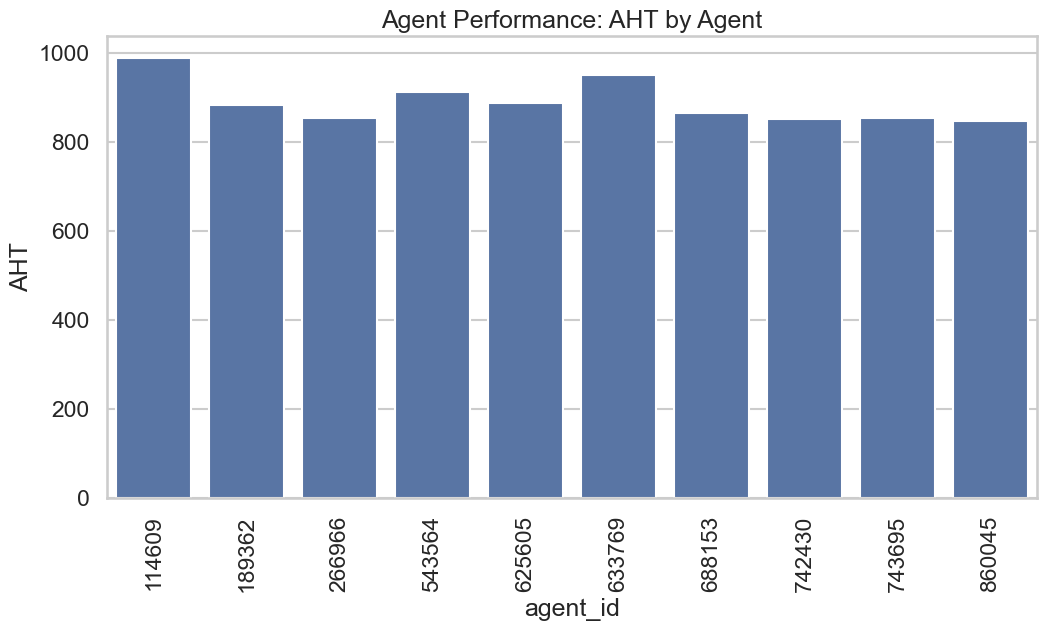

In [39]:

plt.figure(figsize=(12, 6))
sns.barplot(x='agent_id', y='AHT', data=top_10_agents)
plt.xticks(rotation=90)
plt.title("Agent Performance: AHT by Agent")
plt.show()

<h3 style="color:#0033A0">5.Agent-Specific Call Routing (Agent Skill Mismatch) </h3>

In this section we check a particular agent average time for resolving a specific type of call reason.

In [40]:
# Group by agent and call type to calculate average AHT
agent_call_type_aht = final_master_df.groupby(['agent_id', 'primary_call_reason'])['handle_time'].mean().reset_index()

In [41]:
sample_data = agent_call_type_aht[0:50]  # for showing its dependence using we took 50 data rows to show how AHT varies to particular agent with call reason

In [42]:
sample_data

,agent_id,primary_call_reason,handle_time
0,102574,irrops,300.000000
1,102574,post flight,6900.000000
2,103651,baggage,590.000000
3,103651,booking,720.000000
4,103651,check in,420.000000
5,103651,checkout,890.000000
6,103651,communications,745.263158
7,103651,digital support,315.000000
8,103651,disability,220.000000
9,103651,etc,1027.500000


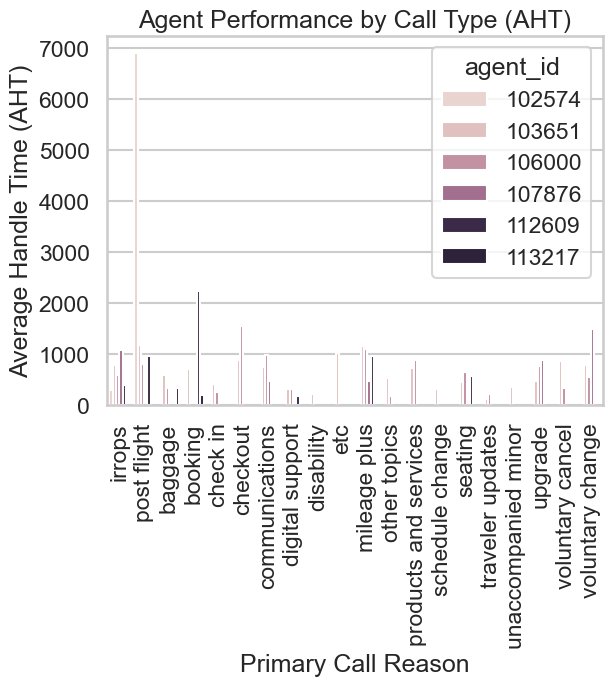

In [43]:
# Visualize agent performance by call type
sns.barplot(x='primary_call_reason', y='handle_time', hue='agent_id', data=sample_data)
plt.title('Agent Performance by Call Type (AHT)')
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Handle Time (AHT)')
plt.xticks(rotation=90)
plt.show()

In [44]:
# Convert the 'agent_assigned_datetime' column to datetime
final_master_df['agent_assigned_datetime'] = pd.to_datetime(final_master_df['agent_assigned_datetime'], errors='coerce')
final_master_df['call_start_datetime'] = pd.to_datetime(final_master_df['call_start_datetime'], errors='coerce')
final_master_df['call_end_datetime'] = pd.to_datetime(final_master_df['call_end_datetime'], errors='coerce')


<h3 style="color:#0033A0">6.Anti-Fatigue and Shift Hours </h3>

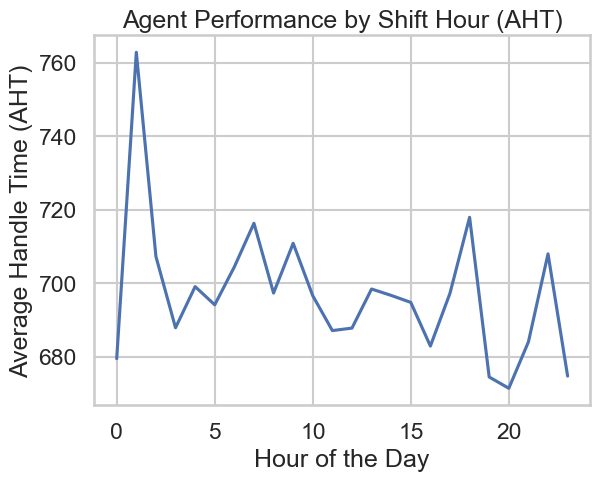

In [45]:
# Extract hour of the day for agent-assigned time (to detect shift hours)
final_master_df['agent_assigned_hour'] = final_master_df['agent_assigned_datetime'].dt.hour

# Analyze agent performance across different hours of their shift
agent_fatigue_df = final_master_df.groupby('agent_assigned_hour')['handle_time'].mean().reset_index()

# Visualize agent performance over time (to identify fatigue patterns)
sns.lineplot(x='agent_assigned_hour', y='handle_time', data=agent_fatigue_df)
plt.title('Agent Performance by Shift Hour (AHT)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Handle Time (AHT)')
plt.show()


<h3 style="color:#0033A0"> 7.Customer Loyality Status </h3>
Checking loyality status relation with AHT and AST

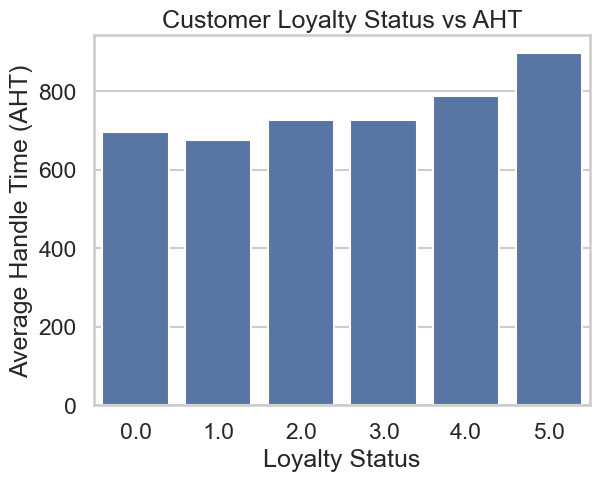

In [46]:
# Group by loyalty status (mp_status) and analyze AHT
loyalty_status_aht = final_master_df.groupby('elite_level_code')['handle_time'].mean().reset_index()

# Visualize loyalty status and AHT
sns.barplot(x='elite_level_code', y='handle_time', data=loyalty_status_aht)
plt.title('Customer Loyalty Status vs AHT')
plt.xlabel('Loyalty Status')
plt.ylabel('Average Handle Time (AHT)')
plt.show()


In [47]:
loyalty_status_aht

,elite_level_code,handle_time
0,0.0,695.999166
1,1.0,675.404739
2,2.0,726.449925
3,3.0,727.510460
4,4.0,788.244706
5,5.0,896.950608


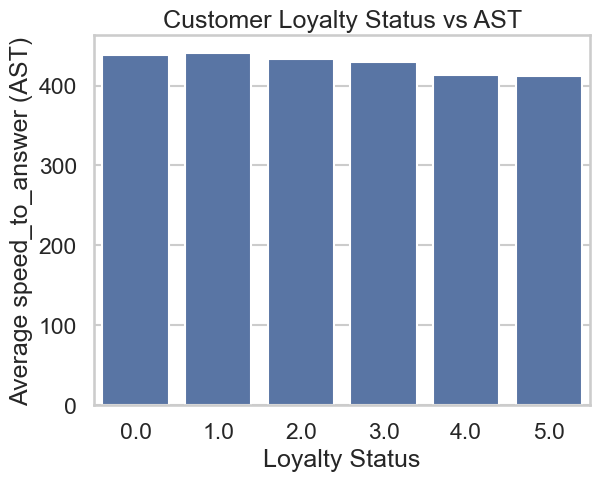

In [48]:
# Group by loyalty status (mp_status) and analyze AHT
loyalty_status_ast = final_master_df.groupby('elite_level_code')['speed_to_answer'].mean().reset_index()

# Visualize loyalty status and AHT
sns.barplot(x='elite_level_code', y='speed_to_answer', data=loyalty_status_ast)
plt.title('Customer Loyalty Status vs AST')
plt.xlabel('Loyalty Status')
plt.ylabel('Average speed_to_answer (AST)')
plt.show()

In [49]:
loyalty_status_ast

,elite_level_code,speed_to_answer
0,0.0,438.579273
1,1.0,440.639809
2,2.0,432.772795
3,3.0,429.341004
4,4.0,413.308235
5,5.0,411.410165


<h3 style="color:#0033A0"> Call Volume </h3>

In [50]:
final_master_df['call_hour'] = final_master_df['call_start_datetime'].dt.hour

KeyError: 'call_volume'

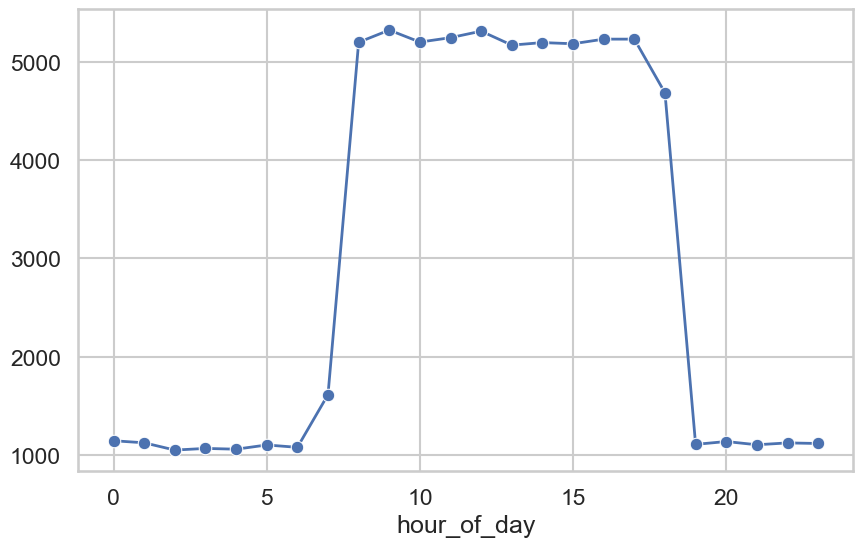

In [51]:
# Extract hour of the day from call start datetime
final_master_df['hour_of_day'] = final_master_df['call_start_datetime'].dt.hour

# Group by hour to calculate the number of calls per hour (to identify high-volume periods)
call_volume_by_hour = final_master_df.groupby('hour_of_day').size()

# Create the plot without explicitly specifying x and y
plt.figure(figsize=(10, 6))
sns.lineplot(data=call_volume_by_hour, marker='o', linewidth=2)

# Highlight max and min points
max_idx = call_volume_by_hour['call_volume'].idxmax()
min_idx = call_volume_by_hour['call_volume'].idxmin()
# Annotate the max (peak) and min (valley) points
plt.annotate('Peak', xy=(max_idx, call_volume_by_hour.iloc[max_idx, 1]), 
             xytext=(max_idx + 1, call_volume_by_hour.iloc[max_idx, 1] + 50),
             arrowprops=dict(facecolor='green', shrink=0.05), fontsize=12, color='green')

plt.annotate('Valley', xy=(min_idx, call_volume_by_hour.iloc[min_idx, 1]), 
             xytext=(min_idx + 1, call_volume_by_hour.iloc[min_idx, 1] + 50),
             arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='red')

# Add titles and labels
plt.title('Call Volume by Hour of the Day', fontsize=16)
plt.xlabel('Index (Hours Inferred)', fontsize=12)
plt.ylabel('Values Inferred from DataFrame', fontsize=12)

# Add gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Show the plot
plt.show()

# Filtering calls for peak hours
peak_hours_df = final_master_df[(final_master_df['hour_of_day'] >= 9) & (final_master_df['hour_of_day'] <= 18)]


In [53]:
final_master_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,handle_time,speed_to_answer,agent_assigned_hour,call_hour,hour_of_day
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,agent: thank you for calling united airlines c...,matthew foster,4.0,voluntary cancel,neutral,angry,-0.04,0.39,1860.0,420.0,0,23,23
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,"agent: thank you for calling united airlines, ...",tammy walters,1.0,booking,calm,neutral,0.02,0.35,720.0,180.0,0,0,0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,agent: thank you for calling united airlines c...,jeffery dixon,1.0,irrops,neutral,polite,-0.13,0.32,1140.0,480.0,0,23,23
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,agent: thank you for calling united airlines c...,david wilkins,2.0,upgrade,neutral,frustrated,-0.20,0.20,420.0,300.0,0,0,0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,agent: thank you for calling united airlines c...,elizabeth daniels,0.0,seating,neutral,polite,-0.05,0.35,540.0,600.0,0,0,0


<Axes: xlabel='hour_of_day', ylabel='speed_to_answer'>

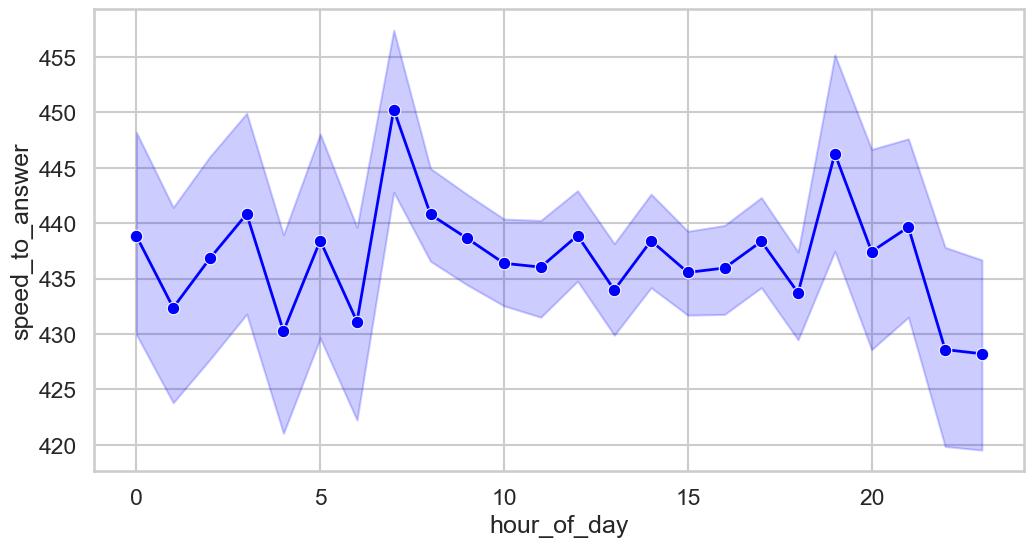

In [55]:
# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour_of_day', y='speed_to_answer', data=final_master_df, marker='o', linewidth=2, color='blue')

In [59]:
 # Filter the DataFrame for high volume hours (between 8 AM and 6 PM inclusive) which we found using graph made above
high_volume_df = final_master_df[(final_master_df["hour_of_day"] >= 8) & (final_master_df["hour_of_day"] <= 18)]


In [60]:
high_volume_df

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,handle_time,speed_to_answer,agent_assigned_hour,hour_of_day,call_hour
140,7127665247,6018774716,274746,2024-08-01 08:01:00,2024-08-01 08:09:00,2024-08-01 08:10:00,"agent: thank you for calling united airlines, ...",joseph galloway,1.0,voluntary change,neutral,polite,0.00,0.07,60.0,480.0,8,8,8
141,3666446277,8968814023,524049,2024-08-01 08:03:00,2024-08-01 08:10:00,2024-08-01 08:16:00,agent: thank you for calling united airlines c...,reginald scott,1.0,digital support,calm,polite,0.07,0.16,360.0,420.0,8,8,8
142,8984455291,2713059876,274746,2024-08-01 08:02:00,2024-08-01 08:11:00,2024-08-01 08:13:00,"agent: thank you for calling united airlines, ...",todd crosby,1.0,checkout,frustrated,polite,-0.38,0.03,120.0,540.0,8,8,8
143,1525233923,7739558002,878048,2024-08-01 08:06:00,2024-08-01 08:12:00,2024-08-01 08:41:00,"customer: hello, thanks for calling united air...",brittany brown,2.0,upgrade,calm,calm,0.10,0.05,1740.0,360.0,8,8,8
144,5431519237,6944762651,758927,2024-08-01 08:01:00,2024-08-01 08:12:00,2024-08-01 08:15:00,agent: thank you for calling united airlines c...,james reynolds,1.0,voluntary change,neutral,calm,0.00,0.18,180.0,660.0,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71464,3362602552,7042178861,229129,2024-08-31 18:54:00,2024-08-31 18:59:00,2024-08-31 19:01:00,"agent: thank you for calling united airlines, ...",kari case,3.0,communications,neutral,frustrated,-0.09,0.33,120.0,300.0,18,18,18
71465,1019207248,9705446726,833458,2024-08-31 18:56:00,2024-08-31 19:01:00,2024-08-31 19:06:00,agent: thank you for calling united airlines c...,james wolf,1.0,irrops,frustrated,frustrated,-0.26,0.24,300.0,300.0,19,18,18
71466,5937077468,6524102345,294450,2024-08-31 18:54:00,2024-08-31 19:01:00,2024-08-31 19:05:00,"agent: thank you for calling united airlines, ...",michael kennedy,2.0,voluntary change,neutral,angry,-0.07,0.04,240.0,420.0,19,18,18
71468,6618338479,5928304553,398990,2024-08-31 18:59:00,2024-08-31 19:07:00,2024-08-31 19:12:00,"agent: thank you for calling united airlines, ...",heather green,4.0,mileage plus,neutral,polite,-0.02,0.07,300.0,480.0,19,18,18


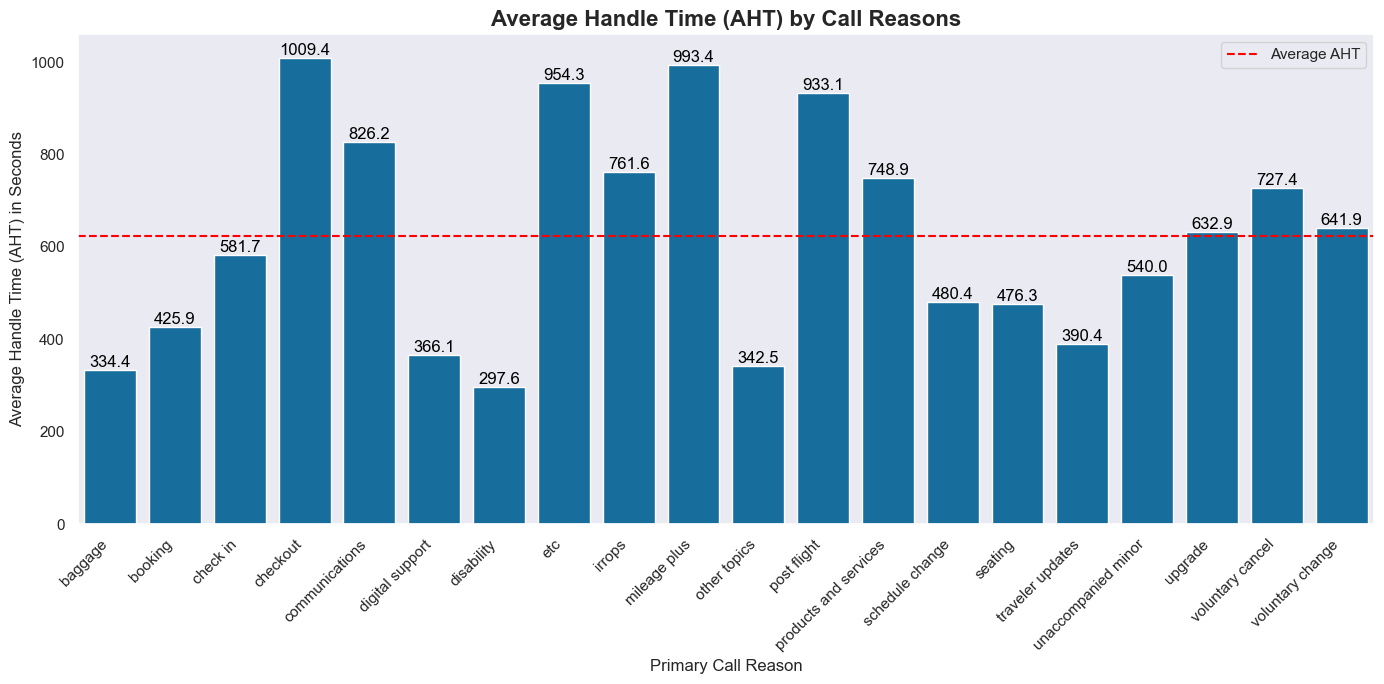

Percentage difference in AHT between most and least frequent call reasons: 41.04%


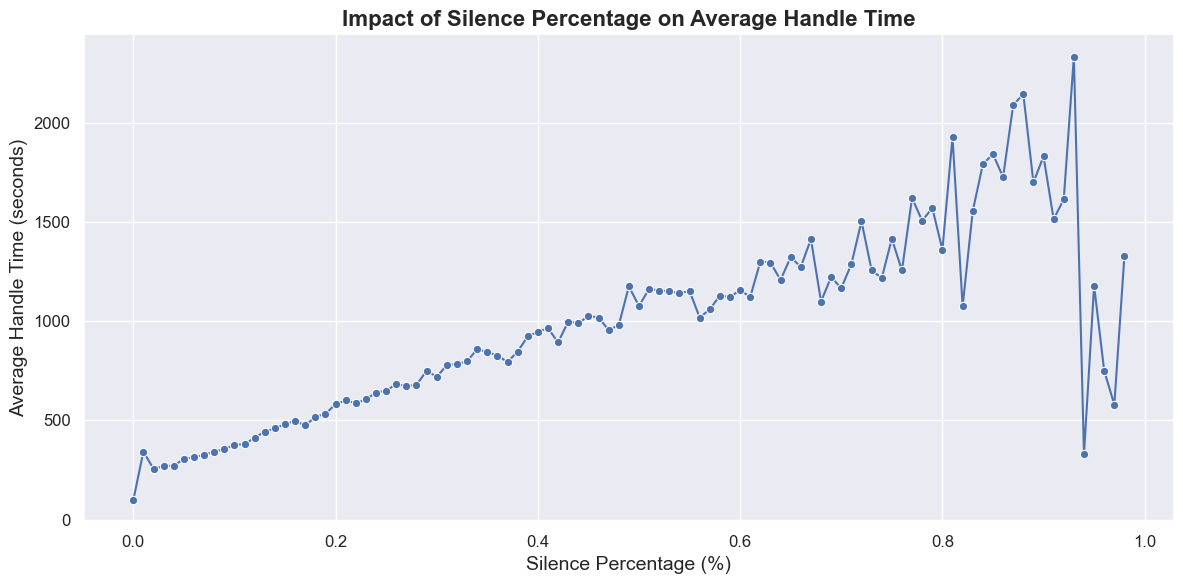

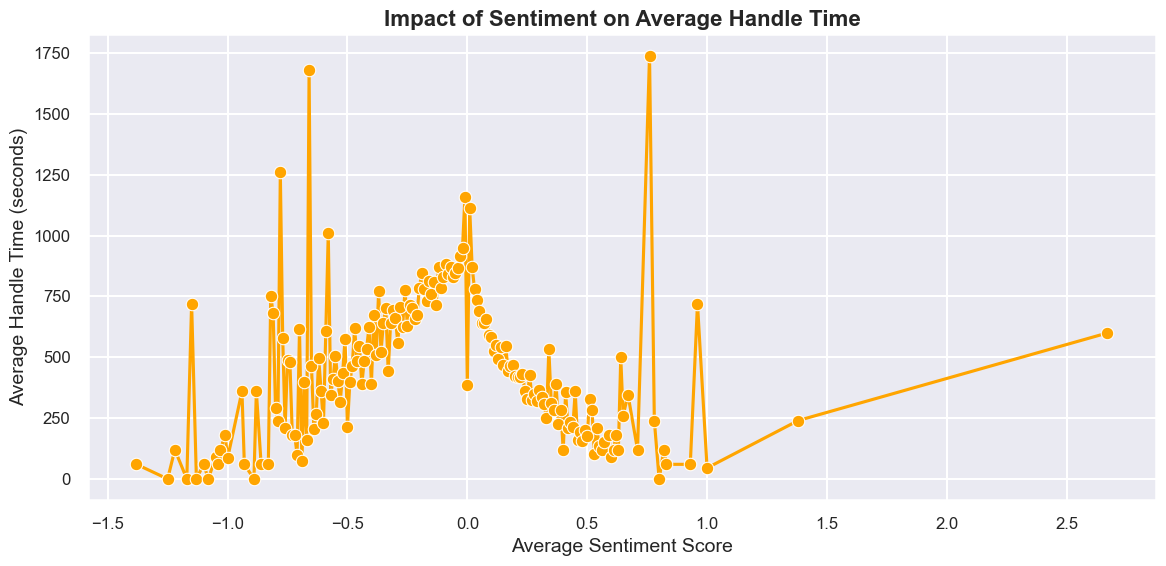

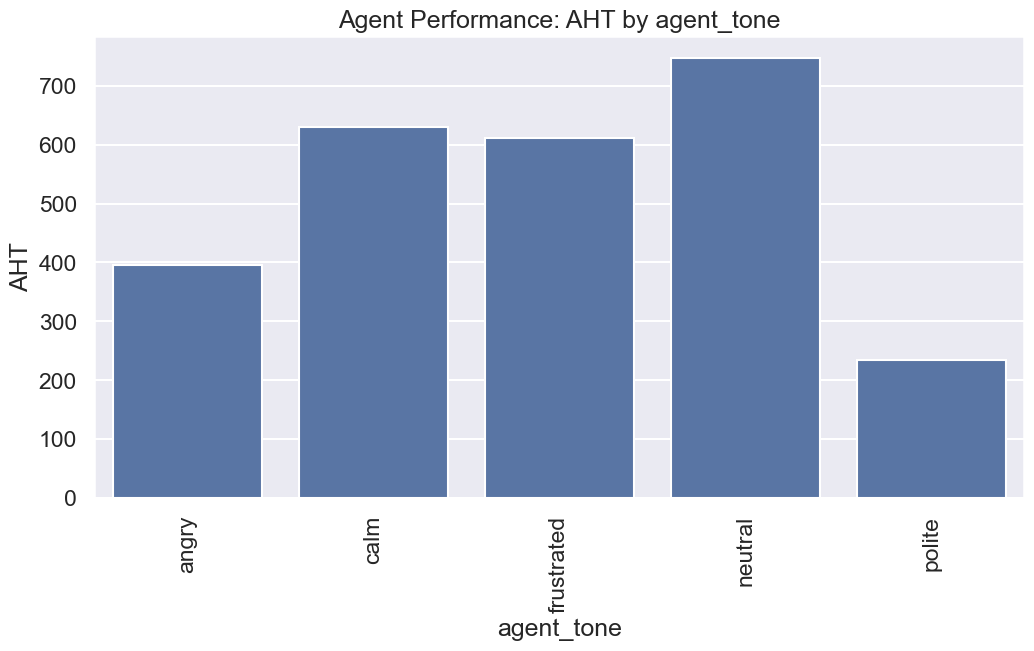

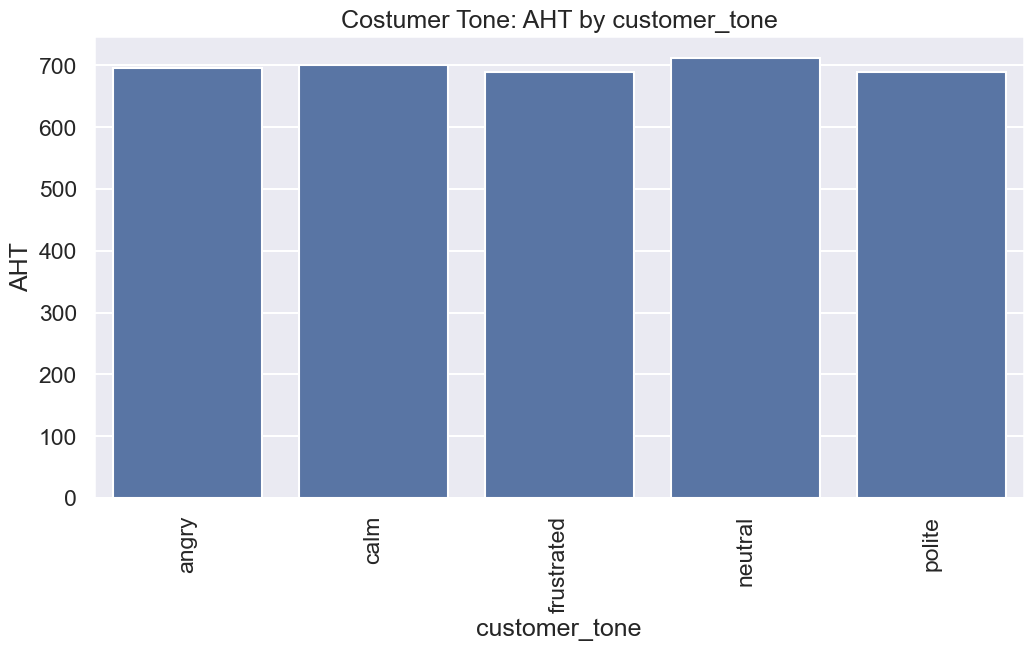

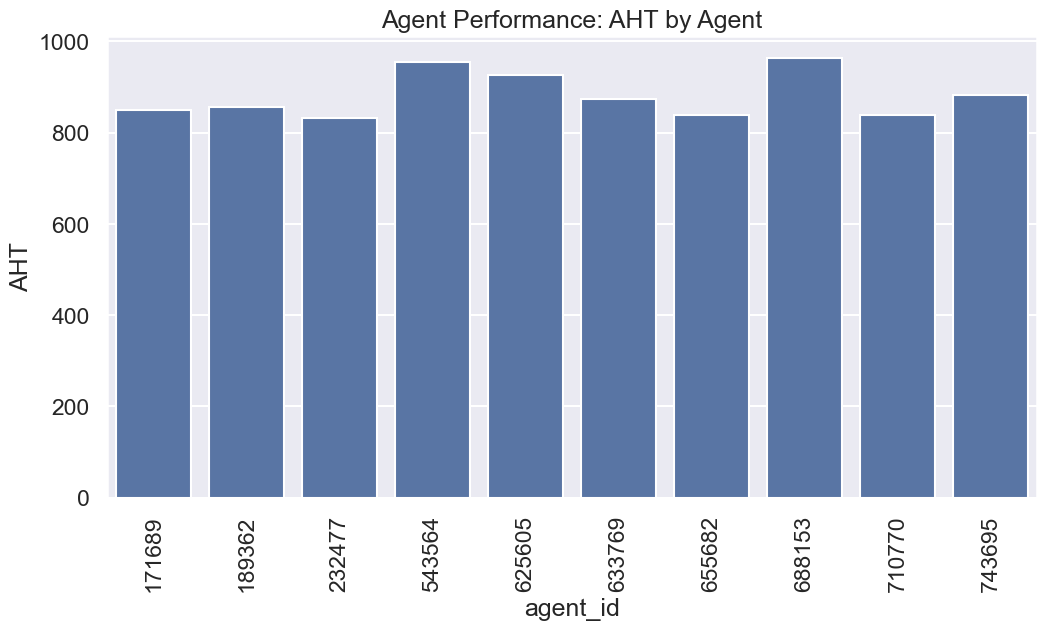

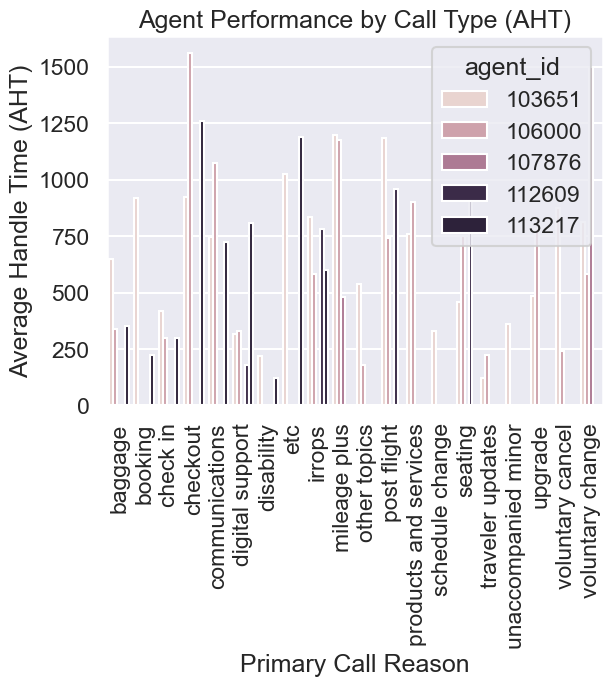

C:\Users\singh\AppData\Local\Temp\ipykernel_23864\3249022019.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_volume_df['agent_assigned_datetime'] = pd.to_datetime(high_volume_df['agent_assigned_datetime'], errors='coerce')
C:\Users\singh\AppData\Local\Temp\ipykernel_23864\3249022019.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_volume_df['call_start_datetime'] = pd.to_datetime(high_volume_df['call_start_datetime'], errors='coerce')
C:\Users\singh\AppData\Local\Temp\ipykernel_23864\32

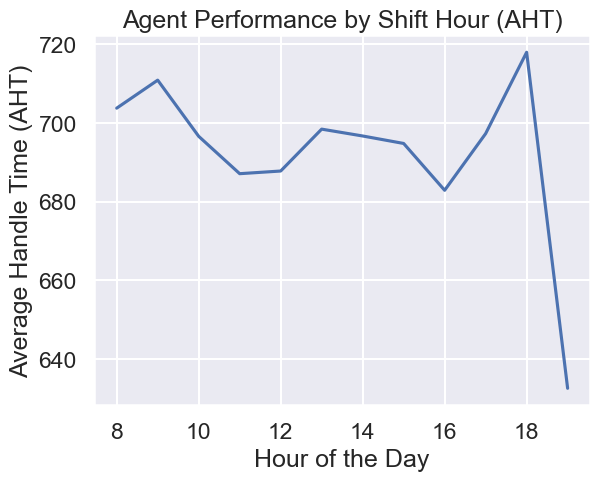

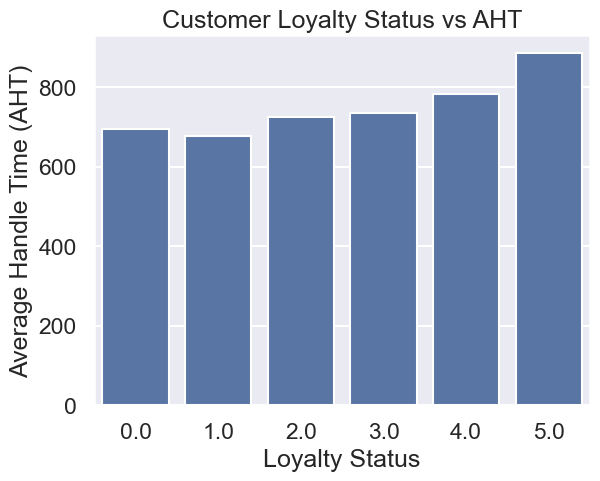

In [62]:
call_reason_stats = high_volume_df.groupby('primary_call_reason').agg({
    'handle_time': 'mean',
    'speed_to_answer': 'mean',
    'call_id': 'count'  # to calculate frequency of each call reason
}).reset_index()

# Renamed columns for clarity
call_reason_stats = call_reason_stats.rename(columns={
    'handle_time': 'AHT',
    'speed_to_answer': 'AST',
    'call_id': 'call_count'
})

# Plotting the call reasons and their corresponding AHT


# Set the style and context for better aesthetics
sns.set(style="dark", palette="colorblind")

# Created the plot
plt.figure(figsize=(14, 7))

# Plot AHT by Call Reasons
sns.barplot(x='primary_call_reason', y='AHT', data=call_reason_stats)
sns.dark_palette("#69d", reverse=True, as_cmap=True)

# Added data labels on top of the bars
for index, row in call_reason_stats.iterrows():
    plt.text(index, row['AHT'], f"{row['AHT']:.1f}", color='black', ha="center", va="bottom")

# Customized the x-ticks
plt.xticks(rotation=45, ha='right')

# Added labels and title
plt.xlabel("Primary Call Reason", fontsize=12)
plt.ylabel("Average Handle Time (AHT) in Seconds", fontsize=12)
plt.title("Average Handle Time (AHT) by Call Reasons", fontsize=16, weight='bold')

# Added a horizontal line for average AHT across all call reasons
plt.axhline(call_reason_stats['AHT'].mean(), color='red', linestyle='--', label='Average AHT')

# Added legend
plt.legend()

plt.tight_layout()
plt.show()

# Sorted by the most frequent call reasons
call_reason_stats = call_reason_stats.sort_values(by='call_count', ascending=False)

# Step 3: Calculated percentage difference between the most frequent and least frequent call reasons in terms of AHT
most_frequent_call_reason = call_reason_stats.iloc[0]['AHT']
least_frequent_call_reason = call_reason_stats.iloc[-1]['AHT']
percentage_difference = ((most_frequent_call_reason - least_frequent_call_reason) / least_frequent_call_reason) * 100

print(f"Percentage difference in AHT between most and least frequent call reasons: {percentage_difference:.2f}%")

# Silence percentage analysis: Checking if high silence percent correlates with long AHT
silence_analysis = high_volume_df.groupby('silence_percent_average').agg({
    'handle_time': 'mean',
    'speed_to_answer': 'mean'
}).reset_index()

# Renamed columns for clarity
silence_analysis = silence_analysis.rename(columns={
    'handle_time': 'AHT_sa',
    'speed_to_answer': 'AST_sa',
})

# Set the style and context for better aesthetics
sns.set(style="dark")  # You can change 'talk' to your preferred context

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='silence_percent_average', y='AHT_sa', data=silence_analysis, marker='o', color='b')

# Add titles and labels
plt.title("Impact of Silence Percentage on Average Handle Time", fontsize=16, fontweight='bold')
plt.xlabel("Silence Percentage (%)", fontsize=14)
plt.ylabel("Average Handle Time (seconds)", fontsize=14)

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Sentiment analysis: Group by sentiment scores to check how customer/agent tone impacts AHT
sentiment_analysis = high_volume_df.groupby('average_sentiment').agg({
    'handle_time': 'mean',
    'speed_to_answer': 'mean'
}).reset_index()

# Rename columns for clarity
sentiment_analysis = sentiment_analysis.rename(columns={
    'handle_time': 'AHT_sea',
    'speed_to_answer': 'AST_sea',
})

# Set the style and context for better aesthetics
sns.set(style="darkgrid", context="talk")  # You can change 'talk' to your preferred context

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='average_sentiment', y='AHT_sea', data=sentiment_analysis, marker='o', color='orange')

# Add titles and labels
plt.title("Impact of Sentiment on Average Handle Time", fontsize=16, fontweight='bold')
plt.xlabel("Average Sentiment Score", fontsize=14)
plt.ylabel("Average Handle Time (seconds)", fontsize=14)

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# Agent tone analysis: Group by agent tone  to check how customer/agent tone impacts AHT
agent_tone_analysis = high_volume_df.groupby('agent_tone').agg({
    'handle_time': 'mean',
    'speed_to_answer': 'mean'
}).reset_index()

# Rename columns for clarity
agent_tone_stats = agent_tone_analysis.rename(columns={
    'handle_time': 'AHT',
    'speed_to_answer': 'AST'
})


plt.figure(figsize=(12, 6))
sns.barplot(x='agent_tone', y='AHT', data=agent_tone_stats)
plt.xticks(rotation=90)
plt.title("Agent Performance: AHT by agent_tone")
plt.show()

# Customer tone analysis: Group by customer tone  to check how customer/agent tone impacts AHT
customer_tone_analysis = high_volume_df.groupby('customer_tone').agg({
    'handle_time': 'mean',
    'speed_to_answer': 'mean'
}).reset_index()

# Rename columns for clarity
customer_tone_stats = customer_tone_analysis.rename(columns={
    'handle_time': 'AHT',
    'speed_to_answer': 'AST'
})

plt.figure(figsize=(12, 6))
sns.barplot(x='customer_tone', y='AHT', data=customer_tone_stats)
plt.xticks(rotation=90)
plt.title("Costumer Tone: AHT by customer_tone")
plt.show()

# Customer tone analysis: Group by customer tone  to check how customer/agent tone impacts AHT
agent_performance_analysis = high_volume_df.groupby('agent_id').agg({
    'handle_time': 'mean',
    'speed_to_answer': 'mean',
    'call_id' : 'count'
}).reset_index()

# Rename columns for clarity
agent_performance_stats = agent_performance_analysis.rename(columns={
    'handle_time': 'AHT',
    'speed_to_answer': 'AST',
    'call_id': 'total_calls'
})

threshold_25th_percentile = agent_performance_stats['total_calls'].quantile(0.25) # found lowest 25th percentile in terms of total calls

agent_performance_stats = agent_performance_stats[agent_performance_stats["total_calls"]>threshold_25th_percentile] #for affecting totally AHT we took ony top 75 percentile who takes 75% calls

sorted_df = agent_performance_stats.sort_values(by='AHT', ascending=False) 
top_10_agents = sorted_df[0:10]  


plt.figure(figsize=(12, 6))
sns.barplot(x='agent_id', y='AHT', data=top_10_agents)
plt.xticks(rotation=90)
plt.title("Agent Performance: AHT by Agent")
plt.show()

# Group by agent and call type to calculate average AHT
agent_call_type_aht = high_volume_df.groupby(['agent_id', 'primary_call_reason'])['handle_time'].mean().reset_index()
sample_data = agent_call_type_aht[0:50]

sns.barplot(x='primary_call_reason', y='handle_time', hue='agent_id', data=sample_data)
plt.title('Agent Performance by Call Type (AHT)')
plt.xlabel('Primary Call Reason')
plt.ylabel('Average Handle Time (AHT)')
plt.xticks(rotation=90)
plt.show()

# Convert the 'agent_assigned_datetime' column to datetime
high_volume_df['agent_assigned_datetime'] = pd.to_datetime(high_volume_df['agent_assigned_datetime'], errors='coerce')
high_volume_df['call_start_datetime'] = pd.to_datetime(high_volume_df['call_start_datetime'], errors='coerce')
high_volume_df['call_end_datetime'] = pd.to_datetime(high_volume_df['call_end_datetime'], errors='coerce')

# Extract hour of the day for agent-assigned time (to detect shift hours)
high_volume_df['agent_assigned_hour'] = high_volume_df['agent_assigned_datetime'].dt.hour

# Analyze agent performance across different hours of their shift
agent_fatigue_df = high_volume_df.groupby('agent_assigned_hour')['handle_time'].mean().reset_index()

# Visualize agent performance over time (to identify fatigue patterns)
sns.lineplot(x='agent_assigned_hour', y='handle_time', data=agent_fatigue_df)
plt.title('Agent Performance by Shift Hour (AHT)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Handle Time (AHT)')
plt.show()

# Group by loyalty status (mp_status) and analyze AHT
loyalty_status_aht = high_volume_df.groupby('elite_level_code')['handle_time'].mean().reset_index()

# Visualize loyalty status and AHT
sns.barplot(x='elite_level_code', y='handle_time', data=loyalty_status_aht)
plt.title('Customer Loyalty Status vs AHT')
plt.xlabel('Loyalty Status')
plt.ylabel('Average Handle Time (AHT)')
plt.show()
